In [154]:
import sys, os, os.path
import glob
import math

In [155]:
import scipy as sp
import numpy as np

import matplotlib
import matplotlib.pyplot as pp

In [156]:
import yt
from yt.frontends.boxlib.data_structures import AMReXDataset

In [157]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [158]:
data_root = "/home/malvarado/FHDeX/exec/immersed_boundary"
data_dir  = "channel_soft"

In [159]:
data_path = os.path.join(data_root, data_dir)

In [160]:
n_fill   = 5
prefix   = "plt"
file_fmt = prefix + "{:0" + str(n_fill) + "d}"

In [161]:
data_glob  = os.path.join(data_path, prefix + "*")
data_files = glob.glob(data_glob)
data_files.sort()

In [162]:
data_files

['/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000000',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000001',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000002',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000003',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000004',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000005',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000006',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000007',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000008',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000009',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000010',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000011',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000012',
 '/home/malvarado/FHDeX/exec/immersed_boundary/chan

### Replace "phi" with "concentration" in plt header file (yt doesn't like phi...)
def substitute_header(plt_file, source="phi", target="concentration"):
    
    # load header file
    header_file = os.path.join(plt_file, "Header")
    with open(header_file, "r") as f:
        header_orig = f.readlines()
    
    # select variable lables
    n_lables   = int(header_orig[1])
    l_offset   = 2
    
    # make a backup copy(iff the source was found in original)
    if source+"\n" in header_orig:
        header_cpy  = os.path.join(plt_file, "Header.backup")
        with open(header_cpy, "w") as f:
            for line in header_orig:
                f.write(line)
    
    # replace source with target
    for i in range(l_offset, n_lables+l_offset):
        if header_orig[i] == source+"\n":
            header_orig[i] = target+"\n"
    
    # save substituted file in place of original
    with open(header_file, "w") as f:
        for line in header_orig:
            f.write(line)

def plot_frame(index, data_files, n_fill):
    prefix   = "frame_"
    file_fmt = prefix + "{:0" + str(n_fill) + "d}.png"
    
    # legacy
    substitute_header(data_files[index])
    
    ds = yt.load(data_files[index])
    
    slc = yt.SlicePlot(ds, "x", "concentration")
    slc.set_log("concentration", False)
    slc.set_zlim("concentration", 1e-100, 1e-5)
    
    #slc.show()
    slc.save(file_fmt.format(index))

# for i in range(0, len(data_files)):
    plot_frame(i, data_files, 4)

In [144]:
# to stitch together the movie:
#    ffmpeg -pattern_type glob -i "frame_*.png" movie.mpeg

In [181]:
ds = yt.load(data_files[-75])

yt : [INFO     ] 2019-07-09 13:21:17,963 Parameters: current_time              = 0.0012999999999999997
yt : [INFO     ] 2019-07-09 13:21:17,964 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-09 13:21:17,965 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 13:21:17,965 Parameters: domain_right_edge         = [1. 1. 1.]


In [182]:
ds.field_list

[('boxlib', 'C'),
 ('boxlib', 'averaged_velx'),
 ('boxlib', 'averaged_vely'),
 ('boxlib', 'averaged_velz'),
 ('boxlib', 'dCdx'),
 ('boxlib', 'dCdx_cen'),
 ('boxlib', 'dCdy'),
 ('boxlib', 'dCdy_cen'),
 ('boxlib', 'dCdz'),
 ('boxlib', 'dCdz_cen'),
 ('boxlib', 'divergence'),
 ('boxlib', 'force_ibm_x'),
 ('boxlib', 'force_ibm_y'),
 ('boxlib', 'force_ibm_z'),
 ('boxlib', 'pres'),
 ('boxlib', 'shifted_force_ibm_x'),
 ('boxlib', 'shifted_force_ibm_y'),
 ('boxlib', 'shifted_force_ibm_z'),
 ('boxlib', 'shifted_velx'),
 ('boxlib', 'shifted_vely'),
 ('boxlib', 'shifted_velz'),
 ('boxlib', 'tracer'),
 ('boxlib', '|Dc|')]

yt : [INFO     ] 2019-07-09 13:21:27,965 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 13:21:27,966 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 13:21:27,967 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 13:21:27,968 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 13:21:27,969 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800



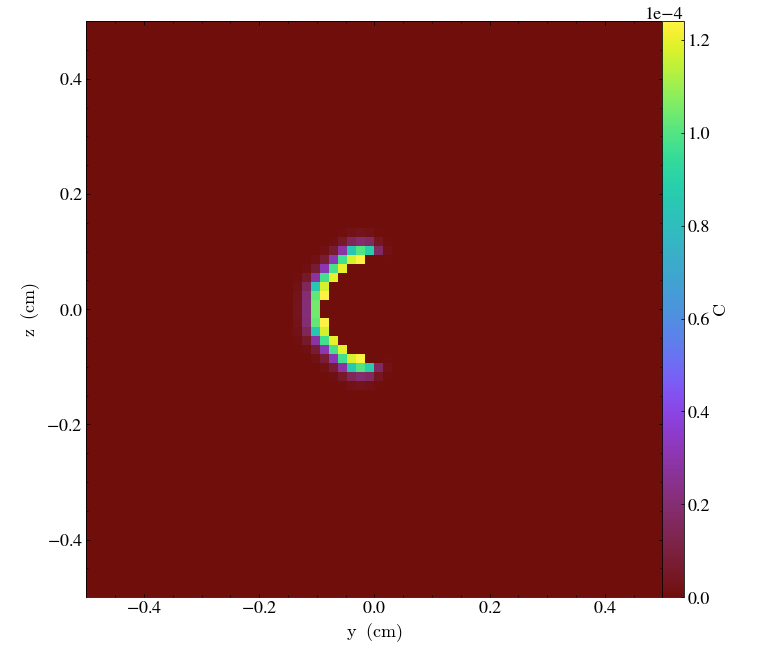

In [183]:
slc = yt.SlicePlot(ds, "x", "C")
slc.set_log("C", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)

slc.show()
#slc.save("step_0.png")

yt : [INFO     ] 2019-07-09 13:21:31,965 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 13:21:31,965 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 13:21:31,967 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 13:21:31,967 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 13:21:31,969 Making a fixed resolution buffer of (('boxlib', 'dCdx_cen')) 800 by 800
yt : [WARNING  ] 2019-07-09 13:21:32,005 Plot image for field ('boxlib', 'dCdx_cen') has both positive and negative values. Min = -0.000577, Max = 0.000577.
yt : [WARNING  ] 2019-07-09 13:21:32,006 Switching to symlog colorbar scaling unless linear scaling is specified later



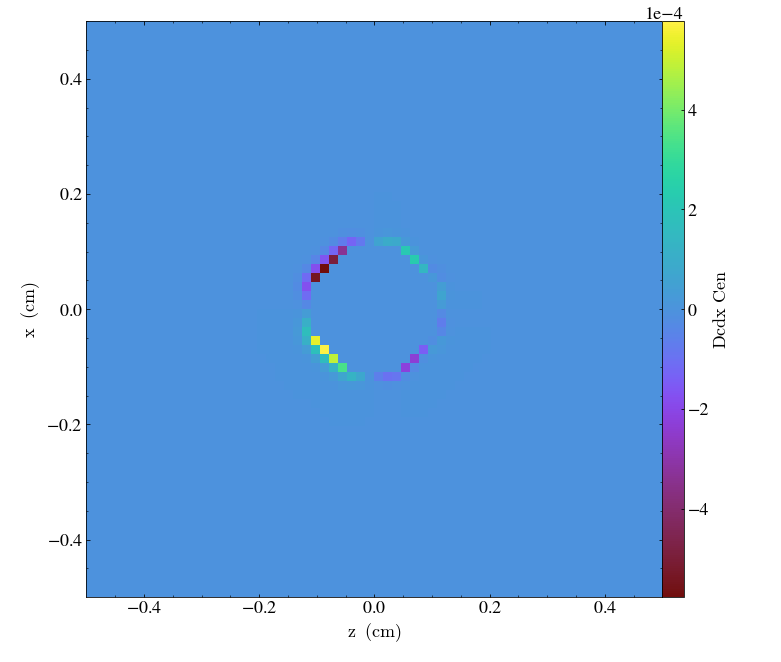

In [184]:
slc = yt.SlicePlot(ds, "y", "dCdx_cen")
slc.set_log("dCdx_cen", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)

slc.show()
#slc.save("step_0.png")

yt : [INFO     ] 2019-07-09 13:21:46,918 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 13:21:46,918 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 13:21:46,919 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 13:21:46,920 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 13:21:46,921 Making a fixed resolution buffer of (('boxlib', 'dCdy_cen')) 800 by 800
yt : [WARNING  ] 2019-07-09 13:21:46,948 Plot image for field ('boxlib', 'dCdy_cen') has both positive and negative values. Min = -0.000546, Max = 0.003017.
yt : [WARNING  ] 2019-07-09 13:21:46,949 Switching to symlog colorbar scaling unless linear scaling is specified later



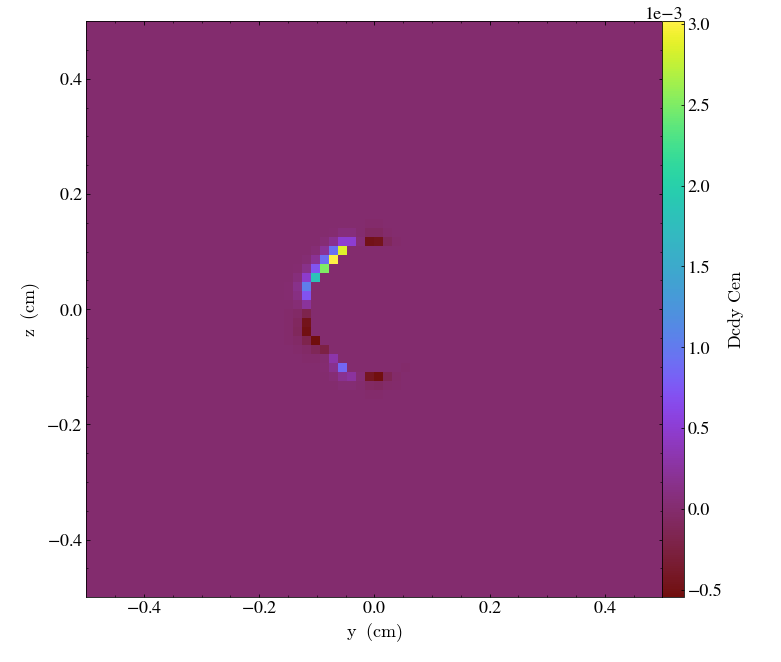

In [186]:
slc = yt.SlicePlot(ds, "x", "dCdy_cen")
slc.set_log("dCdy_cen", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)

slc.show()
#slc.save("step_0.png")

In [151]:
im, sc = yt.create_scene(ds, 'dCdz')


ValueError: not enough values to unpack (expected 2, got 1)

yt : [INFO     ] 2019-07-09 13:21:56,275 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 13:21:56,276 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 13:21:56,277 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 13:21:56,278 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 13:21:56,279 Making a fixed resolution buffer of (('boxlib', 'dCdz_cen')) 800 by 800
yt : [WARNING  ] 2019-07-09 13:21:56,307 Plot image for field ('boxlib', 'dCdz_cen') has both positive and negative values. Min = -0.000718, Max = 0.000039.
yt : [WARNING  ] 2019-07-09 13:21:56,308 Switching to symlog colorbar scaling unless linear scaling is specified later



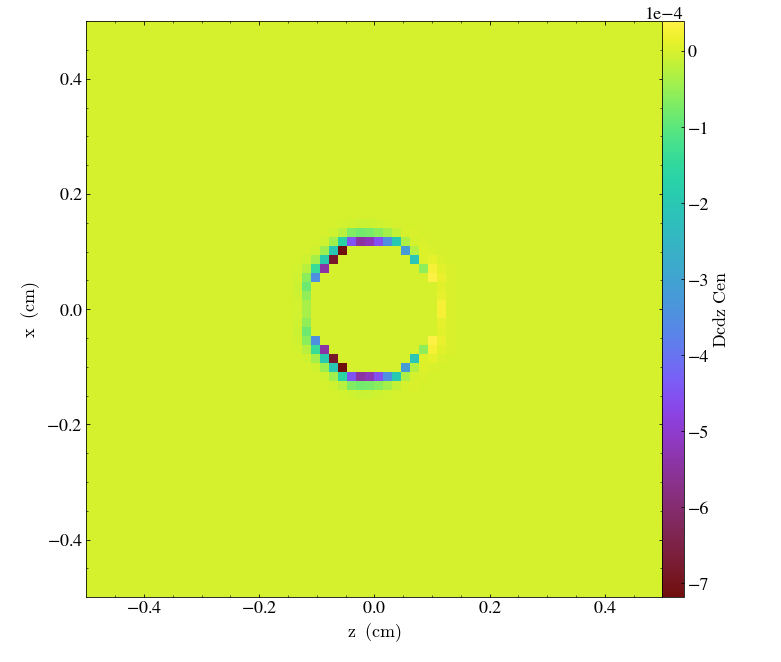

In [187]:
slc = yt.SlicePlot(ds, "y", "dCdz_cen")
slc.set_log("dCdz_cen", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)

slc.show()
#slc.save("step_0.png")

In [ ]:
sc.camera.width = (300, 'kpc')
sc.show()


In [ ]:
slc.annotate_quiver('dCdx_cen', 'dCdy_cen')

yt : [INFO     ] 2019-07-09 13:25:28,433 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 13:25:28,433 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 13:25:28,435 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 13:25:28,436 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 13:25:28,439 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800



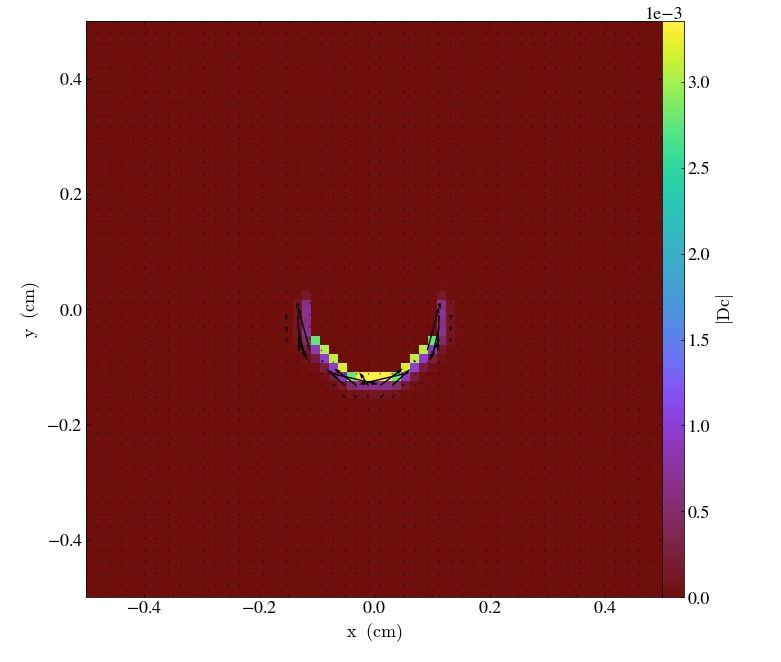

In [191]:
slc = yt.SlicePlot(ds, "z", "|Dc|")
slc.set_log("|Dc|", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)
slc.annotate_quiver('dCdx_cen', 'dCdy_cen',scale=0.01)
slc.show()

(x,  y,  z) C
-----------------------


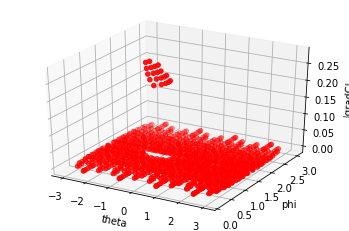

In [111]:
sp= ds.sphere("c", (.1, "cm"))
p=sp["C"]
import array

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import matplotlib.pyplot as plt

#phi1= np.zeros(len(C), dtype = float)#np.array('d');
#theta1= np.zeros(len(C), dtype = float)
#C1= np.zeros(len(C), dtype = float)
#Cdx1= np.zeros(len(C), dtype = float)
#Cdy1= np.zeros(len(C), dtype = float)
#Cdz1= np.zeros(len(C), dtype = float)
phi1=array.array('d');
theta1=array.array('d');
C1=array.array('d');
Cdx1=array.array('d');
Cdy1=array.array('d');
Cdz1=array.array('d');
gradCmag1=array.array('d');
from yt.units import cm
cen=0.5*cm
#print(p)
#plot(p)
#plot = yt.ProfilePlot(p, "radius", "C")

#plot = yt.ProfilePlot(sp,"Psi", "C")

print("(x,  y,  z) C")

print("-----------------------")
for count in range(sp["C"].size):
   j=count
   k=count
   i=count
   phi=(math.acos((sp["z"][k]-cen)/math.sqrt((sp["x"][i]-cen)**2+(sp["y"][j]-cen)**2+(sp["z"][k]-cen)**2)))
   theta=(math.atan2((sp["y"][j]-cen),(sp["x"][i]-cen)))
   gradCmag=math.sqrt((sp["dCdx"][j])**2+(sp["dCdy"][k])**2+(sp["dCdz"][i])**2)
   phi1.append(phi)
   theta1.append(theta)
   #print( theta, sp["y"][j]-cen, sp["x"][i]-cen, (sp["y"][j]-cen)/(sp["x"][i]-cen) )
  # print( math.sqrt((sp["x"][i]-cen)**2+(sp["y"][j]-cen)**2+(sp["z"][k]-cen)**2))
   C1.append(sp["C"][count])
   Cdx1.append(sp["dCdx"][count])
   Cdy1.append(sp["dCdy"][count])
   Cdz1.append(sp["dCdz"][count])
   gradCmag1.append(gradCmag)
  # print("(%f,  %f,  %f)    %f", (phi1, theta1, sp["C"][i]))
    
    #phi1=math.acos((sp["x"][i])/sp["z"][i])
#plot.set_unit('radius', 'cm')
#p.show()
#vec1=numpy.argsort(phi1)
#print(vec1)
#C2 = np.zeros(len(vec1), dtype = float) 
#for i in range(0, len(vec1)): 
#    C2[i]= C1[vec1[i]] 
    #print('Sorted array->', C1[vec1[i]]) 
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data.

# Plot the surface.
#surf = ax.plot_surface(phi1, theta1, Cdx1, linewidth=0, antialiased=False)#, cmap=cm.coolwarm,
                      # )
ax.scatter(theta1, phi1, gradCmag1, c='r', marker='o')
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('|gradC|')
plt.show()

#plt.scatter(phi1, Cdy1)
#axes = plt.gca()
#axes.set_xlim([0, 3.14])
#axes.set_ylim([-0.003,0.003])

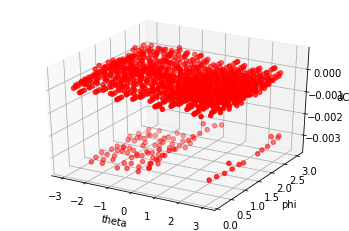

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta1, phi1, Cdy1, c='r', marker='o')
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('dCdx')
plt.show()

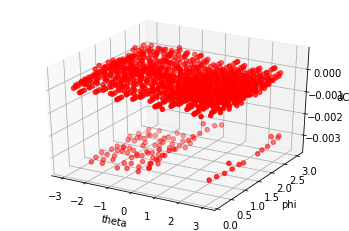

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta1, phi1, Cdy1, c='r', marker='o')
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('dCdy')
plt.show()

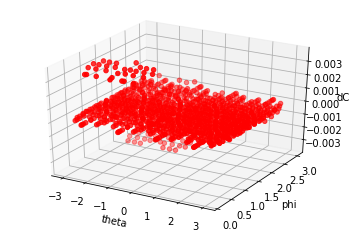

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta1, phi1, Cdz1, c='r', marker='o')
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('dCdz')
plt.show()